In [1]:
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pandas as pd

In [2]:
start_year =  1982
end_year = 2023
obs_name = 'NOAA_OISST'
data_type = 'SSTA_3'

In [13]:
df = pd.read_csv('./data/'+obs_name+'_globmean_sst_data.csv')
df['TIME'] = pd.to_datetime(df['TIME'])
df = df.set_index('TIME')
df = df[~((df.index.month == 2) & (df.index.day == 29))]
df = df[(df.index.year>=start_year) & (df.index.year<=end_year)]

In [14]:
window = 5

In [15]:
anoms = [] # This will be list of pandas Series objects, each series will be anomaly calculated below for each year.
for year in range(start_year, end_year+1):
    # Selecting adjacent 'year +/- window' years except for the year itself. This will be our baseline for that particular year.
    bs_df = df[(df.index.year >= year-window) & (df.index.year <= year+window) & (df.index.year != year)]
    # Calculating mean baseline by grouping the bs_df by 'day (or month) of year' and then calculating anomalies
    anoms = anoms + [df[df.index.year == year]['SST'] - bs_df.groupby([bs_df.index.month, bs_df.index.day]).mean()['SST'].values]
anoms = pd.concat(anoms).to_frame() # Merging all the individual years' anomalies into a dataframe


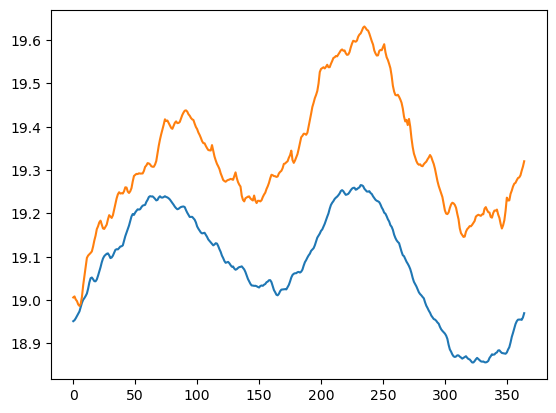

In [16]:
plt.plot(bs_df.groupby([bs_df.index.month, bs_df.index.day]).mean()['SST'].values)
plt.plot(df[df.index.year == year]['SST'].values)